In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

from sklearn.tree import DecisionTreeClassifier


In [8]:
place = pd.read_csv('Placement_Data.csv')
place

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [9]:
place.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
place.shape

(215, 15)

In [11]:
place.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [12]:
place.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

## EDA

In [13]:
place.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [14]:
## after importing the data we have to some EDA like missin value check and data standarization :

place.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


C:\Users\Samsung\AppData\Local\Temp\ipykernel_1116\1340208525.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  place.info(null_counts = True)


In [15]:
## to handle missing value we can use simple imputer to impute mising values
## by mean. median..

from sklearn.impute import SimpleImputer


In [16]:
place['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [17]:
## how to check payment distribution..
print(churn['PaymentMethod'].unique())
print(churn['SeniorCitizen'].unique())
pd.crosstab(churn['SeniorCitizen'],churn['PaymentMethod'])

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[0 1]


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
SeniorCitizen,,,,
0,1311,1301,1771,1518
1,233,221,594,94


In [17]:
place.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
## Next step is to do label encoding on chracter variable:

In [18]:
## i will divide my whole data into categorical and numeric features:
## then i will do label encoding on categrical features:
## i will concat both the dataset to achieve my main data which i will use for Model building:

num = place.select_dtypes(include = np.number)
obj = place.select_dtypes(include = np.object)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

obj2 = obj.apply(le.fit_transform)
obj2.head(2)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_1116\2770291749.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj = place.select_dtypes(include = np.object)


,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1,1,1,1,2,0,1,1
1,1,0,1,2,2,1,0,1


In [19]:
placedf = pd.concat([num,obj2],axis =1)
print(place.shape)
placedf.head(2)
print(placedf.shape)

(215, 15)
(215, 15)


In [20]:
placedf.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [33]:
## start modeling part:
y = placedf['status']
x = placedf.drop(['salary', 'status','sl_no','gender'],axis=1)

In [34]:
x

,ssc_p,hsc_p,degree_p,etest_p,mba_p,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,67.00,91.00,58.00,55.0,58.80,1,1,1,2,0,1
1,79.33,78.33,77.48,86.5,66.28,0,1,2,2,1,0
2,65.00,68.00,64.00,75.0,57.80,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,0,0,2,2,0,1
4,85.80,73.60,73.30,96.8,55.50,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,0,0,0
211,58.00,60.00,72.00,74.0,53.62,1,1,2,2,0,0
212,67.00,67.00,73.00,59.0,69.72,1,1,1,0,1,0
213,74.00,66.00,58.00,70.0,60.23,1,1,1,0,0,1


In [35]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int32

In [36]:
## divide the data into train and test dataset:

## i will buld my model in x_train and y_train and will validate my model via confusion matrix on x_test and y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(x_test.shape)

(172, 11)
(43, 11)


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

treemodel = tree.fit(x_train,y_train)
treemodel.score(x_train,y_train)

1.0

In [39]:
## validate the model on test dataset:
testmodel =  treemodel.score(x_test,y_test)
print(testmodel)

0.8604651162790697


In [40]:
## how to generate confusion matrix on test dataset:

test_predict =treemodel.predict(x_test)
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.93      0.87      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.86      0.84        43
weighted avg       0.87      0.86      0.86        43



C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


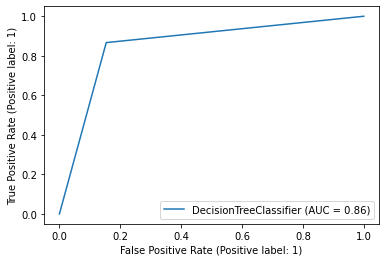

In [41]:
plot_roc_curve(treemodel,x_test,y_test)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [65]:
accuracy_score(y_test,test_predict)

0.8604651162790697

In [ ]:
## we will compare this model with logistic regresion:

[Text(0.4230769230769231, 0.875, 'X[0] <= 63.7\ngini = 0.431\nsamples = 172\nvalue = [54, 118]'),
 Text(0.15384615384615385, 0.625, 'X[1] <= 58.5\ngini = 0.448\nsamples = 65\nvalue = [43, 22]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.23076923076923078, 0.375, 'X[0] <= 55.34\ngini = 0.5\nsamples = 45\nvalue = [23, 22]'),
 Text(0.15384615384615385, 0.125, '\n  (...)  \n'),
 Text(0.3076923076923077, 0.125, '\n  (...)  \n'),
 Text(0.6923076923076923, 0.625, 'X[0] <= 70.945\ngini = 0.184\nsamples = 107\nvalue = [11, 96]'),
 Text(0.5384615384615384, 0.375, 'X[4] <= 71.56\ngini = 0.375\nsamples = 40\nvalue = [10, 30]'),
 Text(0.46153846153846156, 0.125, '\n  (...)  \n'),
 Text(0.6153846153846154, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.375, 'X[4] <= 69.735\ngini = 0.029\nsamples = 67\nvalue = [1, 66]'),
 Text(0.7692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 0.125, '\n  (...)  \n')]

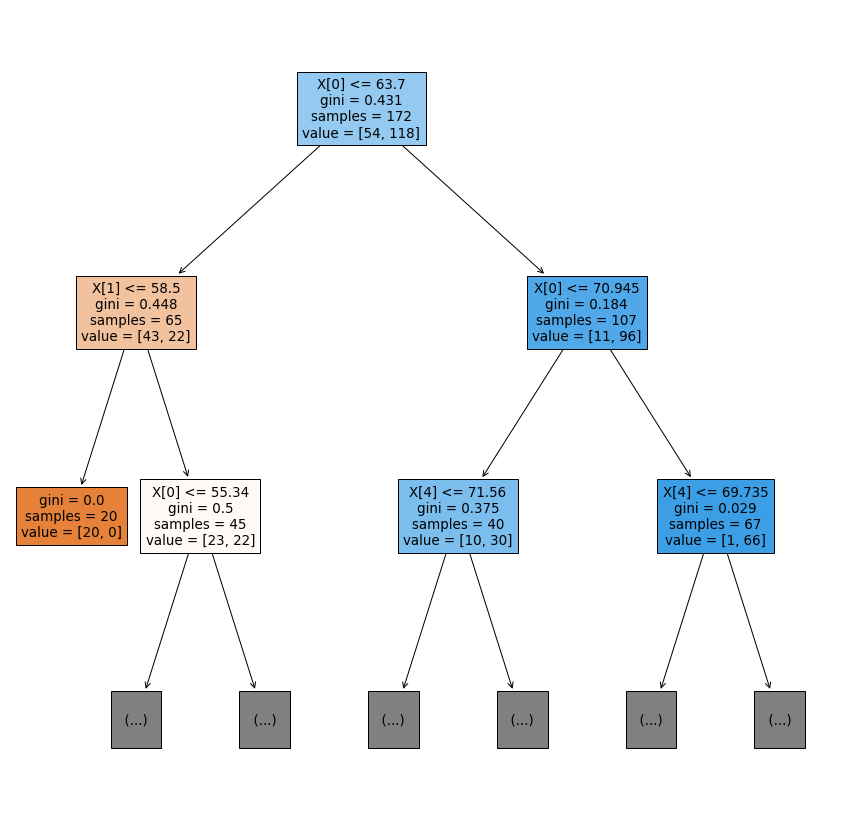

In [42]:
## how to check the tree:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,15))
plot_tree(treemodel,max_depth =2,filled = True)

In [43]:
from sklearn.tree import export_text
r = export_text(treemodel,feature_names=(list(x_train.columns)))
print(r)

|--- ssc_p <= 63.70
|   |--- hsc_p <= 58.50
|   |   |--- class: 0
|   |--- hsc_p >  58.50
|   |   |--- ssc_p <= 55.34
|   |   |   |--- hsc_s <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- hsc_s >  1.50
|   |   |   |   |--- specialisation <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- specialisation >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- ssc_p >  55.34
|   |   |   |--- workex <= 0.50
|   |   |   |   |--- degree_p <= 73.00
|   |   |   |   |   |--- degree_p <= 65.50
|   |   |   |   |   |   |--- degree_p <= 57.43
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- degree_p >  57.43
|   |   |   |   |   |   |   |--- ssc_b <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- ssc_b >  0.50
|   |   |   |   |   |   |   |   |--- specialisation <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- specialisation >  0.50
|   |   |   |   |   |   |   |   |   |--- mba_p

In [ ]:
#comparsion wtih logistsic regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logisticRegr = LogisticRegression()

In [68]:
#####Model Fitting/Training###
log_model=logisticRegr.fit(x_train, y_train)

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
test_pred = logisticRegr.predict(x_test)

In [48]:
test_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
x_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
20,62.00,65.0,66.00,50.00,56.70,1,1,1,0,0,1
11,69.60,68.4,78.30,60.00,63.70,0,0,1,0,1,0
125,84.00,73.0,73.00,75.00,73.33,0,0,1,0,0,0
186,52.00,64.0,61.00,55.00,62.93,0,0,1,0,0,0
209,62.00,72.0,65.00,67.00,56.49,0,0,1,0,0,0
179,77.80,64.0,64.20,75.50,72.14,0,0,2,2,0,1
94,58.00,62.0,64.00,53.88,54.97,0,0,1,0,0,0
115,73.00,63.0,66.00,89.00,60.50,1,1,2,0,0,0
159,52.00,49.0,58.00,62.00,60.59,0,1,1,0,0,1
111,51.00,54.0,61.00,60.00,60.64,1,1,2,2,0,1


In [50]:
test_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
pd.DataFrame(logisticRegr.predict_proba(x_test))

,0,1
0,0.139158,0.860842
1,0.008912,0.991088
2,0.092334,0.907666
3,0.813071,0.186929
4,0.100949,0.899051
5,0.782601,0.217399
6,0.156542,0.843458
7,0.078250,0.921750
8,0.949062,0.050938
9,0.953274,0.046726


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [60]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[11,  2],
       [ 0, 30]], dtype=int64)

In [61]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.94      1.00      0.97        30

    accuracy                           0.95        43
   macro avg       0.97      0.92      0.94        43
weighted avg       0.96      0.95      0.95        43



In [62]:
accuracy_score(y_test,test_pred)

0.9534883720930233

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


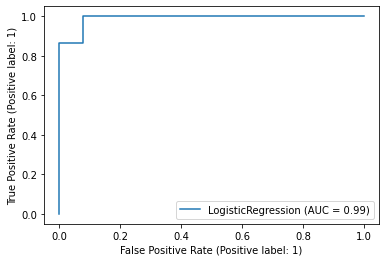

In [69]:
plot_roc_curve(log_model,x_test,y_test)